# **Data Collection**

## Objectives

* Data preparation

## Inputs

* Dataset in outputs/datasets/collection/employee-attrition.csv

## Outputs

* Cleaned dataset


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os

current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/attrition-predictor'

---

# Data Exploration

Using the pandas library, the dataset can be loaded as a dataframe and the data inspected.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [3]:
df = pd.read_csv(f"outputs/datasets/collection/employee-attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


A summary of the dataframe columns, non-null counts and datatypes can be obtained.

In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("-----------------------------")
print("A summary of the dataframe")
print("-----------------------------")
df.info()

The dataset has 1470 rows and 28 columns
-----------------------------
A summary of the dataframe
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobS

## Pandas profiling

In [6]:
from ydata_profiling import ProfileReport


pandas_report = ProfileReport(df=df, title="Overview of the attrition dataset", minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Another way to print the categorical variables unique values and numerical values ranges. This shall give an indication of whether columns need to be dropped or their data type converted.

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} | {df[col].dtype} | unique values of: {df[col].unique()}')
        print('---------------------------------------------------------------')
    if df[col].dtype == 'int64':
        print(f'{col} | {df[col].dtype} | {df[col].min()} - {df[col].max()}')
        print('---------------------------------------------------------------')

Age | int64 | 18 - 60
---------------------------------------------------------------
Attrition | object | unique values of: ['Yes' 'No']
---------------------------------------------------------------
BusinessTravel | object | unique values of: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------------------------------------------------------
Department | object | unique values of: ['Sales' 'Research & Development' 'Human Resources']
---------------------------------------------------------------
DistanceFromHome | int64 | 1 - 29
---------------------------------------------------------------
Education | int64 | 1 - 5
---------------------------------------------------------------
EducationField | object | unique values of: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
---------------------------------------------------------------
EnvironmentSatisfaction | int64 | 1 - 4
------------------------------------------------------------

Get summary statistics

In [6]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,961,NaN,NaN,606,NaN,882,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,2.721769,NaN,2.729932,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,NaN,8.106864,1.024165,NaN,1.093082,NaN,0.711561,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,3.000000,NaN,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,4.000000,NaN,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


We can plot Attrition separately to see how balanced our target variable is in the dataset. It is apparent that there is an imbalance in data as there is almost 6 times data points with 'No attrition' than there are for 'Yes attrition'. A rebalance will be needed before training the model.

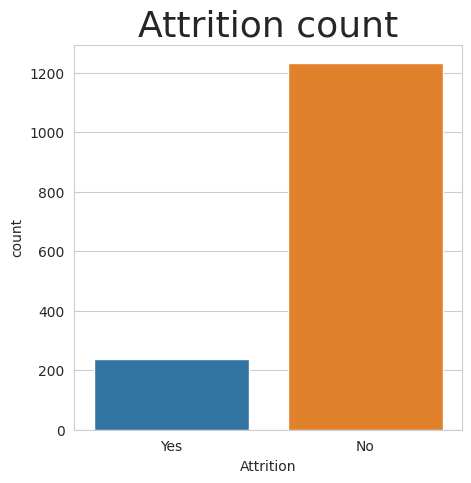

In [7]:
fig, axes = plt.subplots(figsize=(5,5))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition count', fontsize=26)
plt.show()

Check the normalized labels' frequencies for each variable to see if we need to perform Rare label encoding later. It seems that we will not need it.

In [8]:
for col in df.columns.to_list():
  print(f"{df[col].value_counts(normalize=True)} \n\n")

Age
35    0.053061
34    0.052381
36    0.046939
31    0.046939
29    0.046259
32    0.041497
30    0.040816
33    0.039456
38    0.039456
40    0.038776
37    0.034014
27    0.032653
28    0.032653
42    0.031293
39    0.028571
45    0.027891
41    0.027211
26    0.026531
44    0.022449
46    0.022449
43    0.021769
50    0.020408
25    0.017687
24    0.017687
49    0.016327
47    0.016327
55    0.014966
51    0.012925
53    0.012925
48    0.012925
54    0.012245
52    0.012245
22    0.010884
56    0.009524
23    0.009524
58    0.009524
21    0.008844
20    0.007483
59    0.006803
19    0.006122
18    0.005442
60    0.003401
57    0.002721
Name: proportion, dtype: float64 


Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64 


BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64 


Department
Research & Development    0.653741
Sales                     0.303401
Human Resources

## Data preparation

Here we will:
1. Drop columns
2. Change attrition data type
3. Perform one hot encoding to transform categorical data to numerical (needed for correlation)

Let's drop the columns:
* Daily rate, hourly rate and monthly rate as they are ambiguous, we will use the monthly income instead
* Employee count, Over 18 and Standard hours as they have one value i.e. constant
* Employee number (or ID) as it shall not affect the statistics

In [9]:
try:
    df = df.drop(['DailyRate','EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'StandardHours', 'Over18'], axis=1)
except KeyError:
    pass

df.shape

(1470, 28)

Change the target from categorical to numerical to prepare for correlation analysis

In [10]:
df['Attrition'] = df['Attrition'].replace({"Yes":1, "No":0})
df['Attrition'].dtype

dtype('int64')

Perform the encoding

In [11]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=True)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1470, 42)


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Single,MaritalStatus_Married,OverTime_Yes
0,41,1,1,2,2,3,2,4,5993,8,...,0,0,0,0,0,0,0,1,0,1
1,49,0,8,1,3,2,2,2,5130,1,...,1,0,0,0,0,0,0,0,1,0
2,37,1,2,2,4,2,1,3,2090,6,...,0,1,0,0,0,0,0,1,0,1


In [12]:
df_ohe.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Rarely', 'BusinessTravel_Travel_Frequently',
       'Department_Sales', 'Department_Research & Development',
       'EducationField_Life Sciences', 'EducationField_Other',
       'EducationField_Medical', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'Gender_Female',
       'JobRole_Sales Executive', 'JobRole_Research Scientist',
       'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director',
       'JobRole_Healthcare Representative', 'JobRole_Manager',
       'JobRol

## Correlation analysis

We perform the correlation analysis with Spearman and Pearson methods to understand how Attrion correlates to other features.

### Spearman method

Spearman correlation measures the monotonic relationship between two variables

In [13]:
corr_spearman = df_ohe.corr(method='spearman')['Attrition'].sort_values(key=abs, ascending=False)[1:].head(10)
df_spearman = corr_spearman.to_frame()
print(df_spearman)
spearman_corr_variables = df_spearman.index.to_list()
print(f'10 Highest correlated variables to Attrition according Spearman method are {spearman_corr_variables}')

                      Attrition
OverTime_Yes           0.246118
TotalWorkingYears     -0.199002
MonthlyIncome         -0.198305
YearsAtCompany        -0.190419
JobLevel              -0.190370
YearsInCurrentRole    -0.180623
MaritalStatus_Single   0.175419
YearsWithCurrManager  -0.175355
StockOptionLevel      -0.172296
Age                   -0.171214
10 Highest correlated variables to Attrition according Spearman method are ['OverTime_Yes', 'TotalWorkingYears', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel', 'YearsInCurrentRole', 'MaritalStatus_Single', 'YearsWithCurrManager', 'StockOptionLevel', 'Age']


We can also plot the heatmap to confirm this finding

In [14]:
def heatmap_corr(data, threshold):
  """
  plots the heatmap - this function was adopted from EDA tools lesson
  Arguments:
    - data : dataframe
    - threshold: threshold for correlation to show on plot
  """
  # create the mask for the upper diagonal and
  # show only values greater than the threshold
  mask = np.zeros_like(data, dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  mask[abs(data) < threshold] = True

  # we plot the heatmap as usual
  fig, axes = plt.subplots(figsize=(16,8))
  sns.heatmap(data=data, annot=True, xticklabels=True, yticklabels=True,
              mask=mask, cmap='viridis', annot_kws={"size": 6}, ax=axes,
              linewidth=0.5
              )
  plt.ylim(len(data.columns),0)
  plt.show()

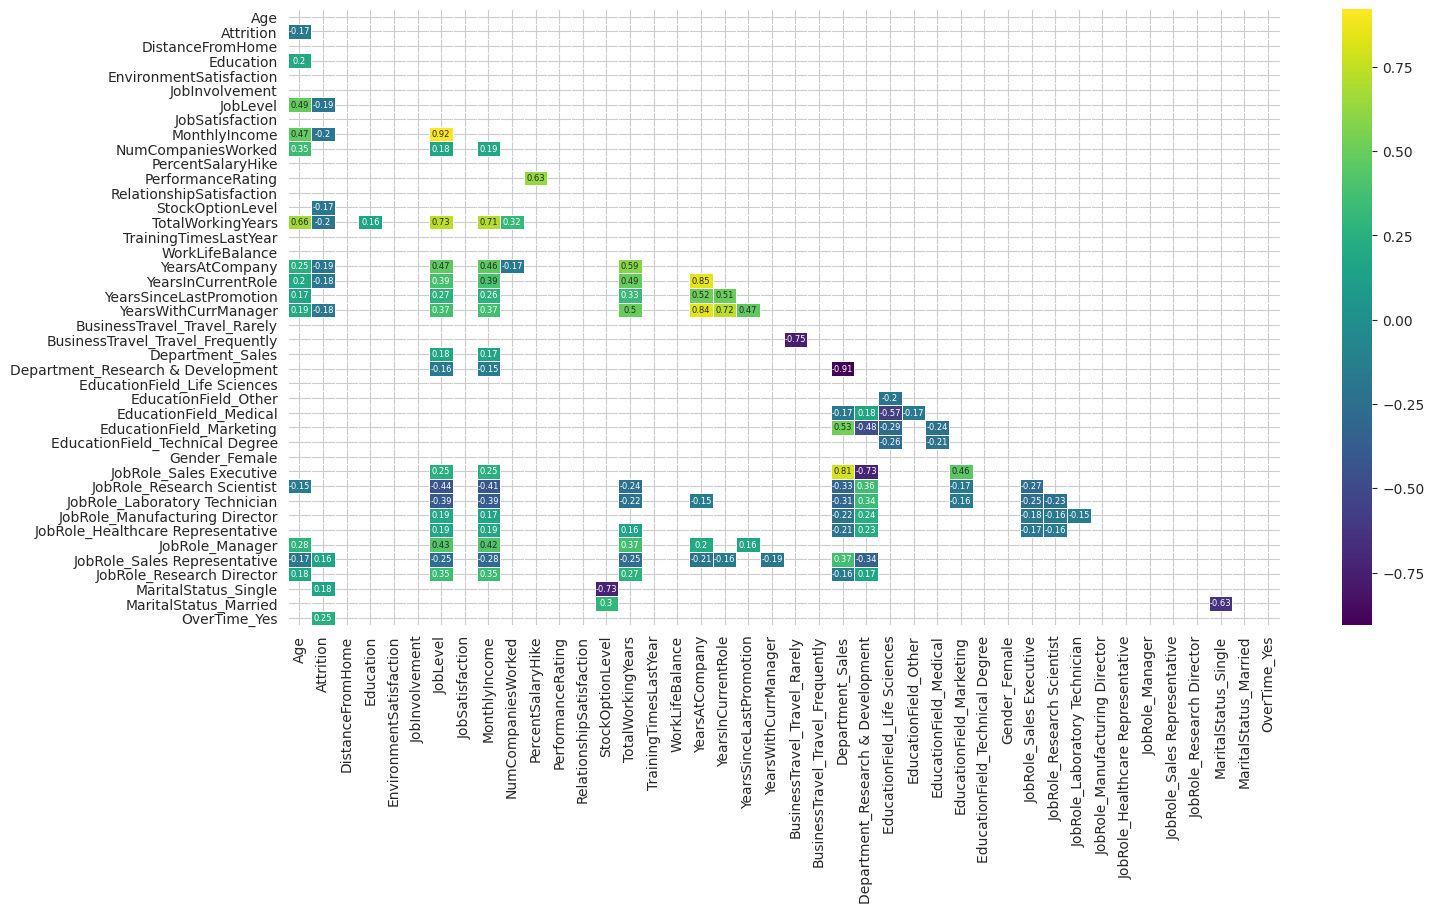

In [15]:
df_spearman = df_ohe.corr(method='spearman')
heatmap_corr(data= df_spearman, threshold=0.15)

### Pearson method

Assumes change at a constant rate. The correlation coefficient measures the **linear** relationship between two numerical variables

In [17]:
corr_pearson = df_ohe.corr(method='pearson')['Attrition'].sort_values(key=abs, ascending=False)[1:].head(10)
df_pearson = corr_pearson.to_frame()
print(df_pearson)
pearson_corr_variables = df_pearson.index.to_list()
print(f'10 Highest correlated variables to Attrition according Pearson method are {pearson_corr_variables}')

                              Attrition
OverTime_Yes                   0.246118
MaritalStatus_Single           0.175419
TotalWorkingYears             -0.171063
JobLevel                      -0.169105
YearsInCurrentRole            -0.160545
MonthlyIncome                 -0.159840
Age                           -0.159205
JobRole_Sales Representative   0.157234
YearsWithCurrManager          -0.156199
StockOptionLevel              -0.137145
10 Highest correlated variables to Attrition according Pearson method are ['OverTime_Yes', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel']


In [20]:
df_pearson = df_ohe.corr(method='pearson')
heatmap_corr(data= df_pearson, threshold=0.15)

Generally for both correlation methods, the correlation between attrition and other variables is either very weak or weak. We will consider the highest 10 correlation variables from both methods.

In [45]:
print(f'Pearson method showed {set(pearson_corr_variables) - set(spearman_corr_variables)} is important but Spearman not!')
print(f'Spearman method showed {set(spearman_corr_variables) - set(pearson_corr_variables)} is important but Pearson not!')
vars_to_consider = set(pearson_corr_variables + spearman_corr_variables)
print(f'We will consider a combination of {len(vars_to_consider)} unique variables: {vars_to_consider}')

Pearson method showed {'JobRole_Sales Representative'} is important but Spearman not!
Spearman method showed {'YearsAtCompany'} is important but Pearson not!
We will consider a combination of 11 unique variables: {'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'OverTime_Yes', 'YearsInCurrentRole', 'JobLevel', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'Age', 'MonthlyIncome', 'StockOptionLevel'}


Have a look on the distribution of our main numerical variables. It seems that only 'Age' variable is normally distributed while the remaining variables are either skewed or Poisson-distributed. We will cover this in more detail in the feature engineering notebook.

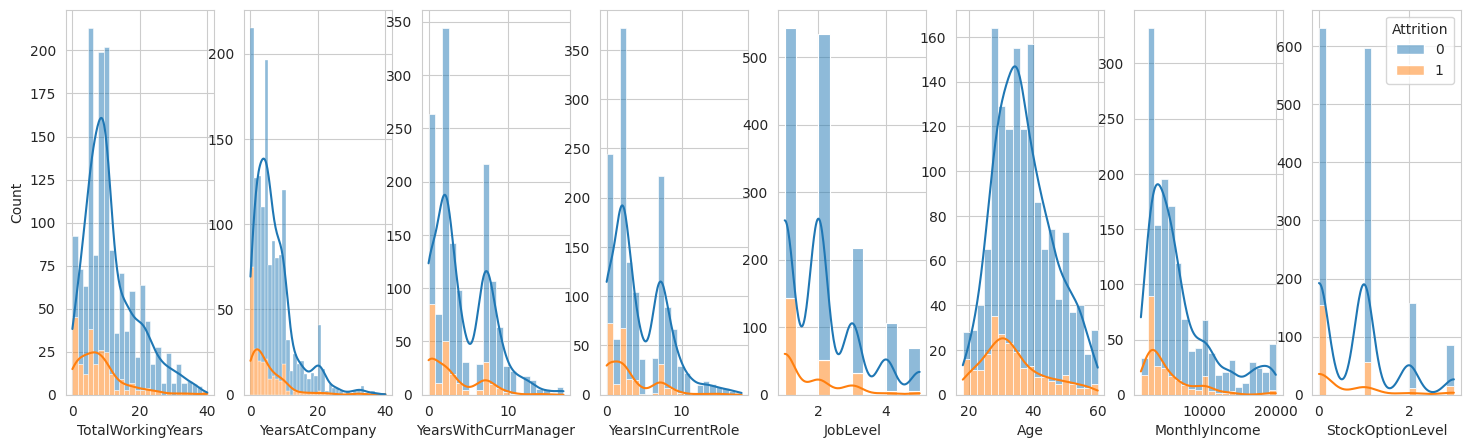

In [56]:
# There are 8 numerical variables within these 11 variables to consider
num_vars = 8
fig, axes = plt.subplots(1, num_vars, figsize=(18,5))

a = 0
for col in vars_to_consider:
    if len(df_ohe[col].unique()) > 2:
        if a==0:
            sns.histplot(data=df_ohe, x=col, hue='Attrition', ax=axes[0], kde=True, legend=False, multiple="stack")
        elif a>0 and a<num_vars-1:
            plot = sns.histplot(data=df_ohe, x=col, hue='Attrition', ax=axes[a], kde=True, legend=False, multiple="stack")
            plot.set(ylabel=None)
        else:
            plot = sns.histplot(data=df_ohe, x=col, hue='Attrition', ax=axes[a], kde=True, multiple="stack")
            plot.set(ylabel=None)
        a += 1

plt.show()

## Predictive Power Score

An alternative to the correlation level study. We can detect linear or non-linear relationships between variables using predictive power score (PPS). It works also on asymmetric relationships. Here we don't need to encode categorical variables.

---

# Save the Dataset

Save dataset in the outputs directory

In [22]:
# try:
#   os.makedirs(name="outputs/datasets/collection")
# except Exception as e:
#   print(e)

# df.to_csv(f"outputs/datasets/collection/employee-attrition.csv", index=False)

---

# Conclusions

In this notebook, the following was achieved:
* The dataset was imported via Kaggle API
* The dataset summary was displayed and checked for no-null entries
* The dataset was saved in the outputs directory

# Next Steps

In the next notebook, an exploratory data analysis will be carried out using Pandas profiling and correlation studies.